Total number of rows: 462
Total number of columns: 31
Total number of null values in dataset is: 1192
Number of each event type:
Protests                      327
Violence against civilians     85
Battles                        29
Riots                          11
Strategic developments          8
Explosions/Remote violence      2
Name: event_type, dtype: int64
Number of each event type per location:
event_type                  admin1        
Battles                     Central Darfur     1
                            East Darfur        1
                            Gedaref            2
                            North Darfur       1
                            North Kordofan     2
                            South Darfur       2
                            South Kordofan     5
                            West Darfur       13
                            West Kordofan      2
Explosions/Remote violence  Gedaref            1
                            West Darfur        1
Protests      

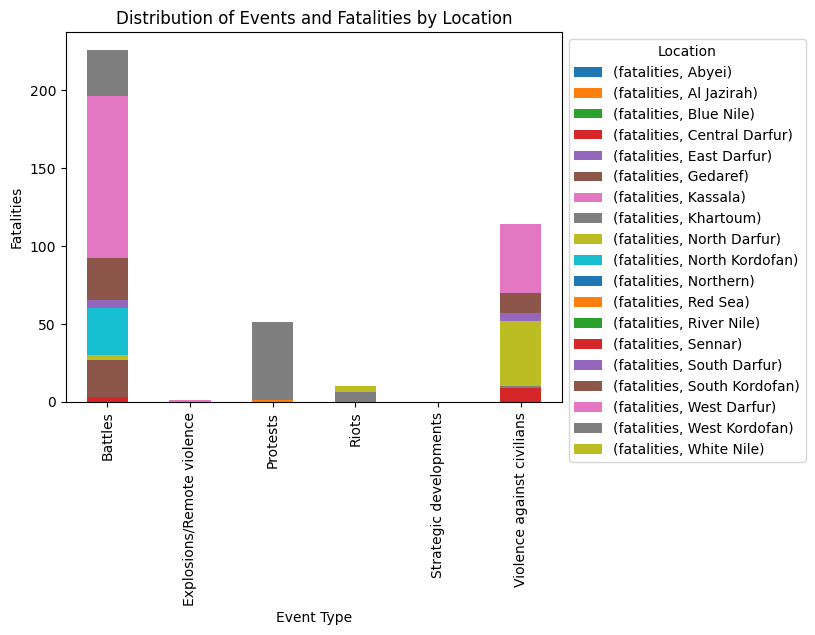

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('SudanData2021.csv')
df.head()

# Get the number of rows and columns in the DataFrame
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the results
print(f'Total number of rows: {num_rows}')
print(f'Total number of columns: {num_cols}')
# Get the number of null values in dataset
all_null_counts = df.isnull().sum().sum()
print("Total number of null values in dataset is:",all_null_counts)


# Count the number of each event type
event_counts = df['event_type'].value_counts()

# Print the results
print('Number of each event type:')
print(event_counts)


    
    # Group the DataFrame by event type and location and count the occurrences
event_counts = df.groupby(['event_type', 'admin1']).size()

# Print the results
print('Number of each event type per location:')
print(event_counts)



# Group the DataFrame by event type and number of fatalities and count the occurrences
fatalities_counts =  df.groupby('event_type')['fatalities'].sum()
# df.groupby(['event_type', 'fatalities']).size()


# Print the results
print('Number of each fatalities per each event type:')
print(fatalities_counts)

# Create a pivot table with 'event type' and 'location' as rows, and 'fatalities' as values
table = pd.pivot_table(df, values='fatalities', index=['event_type', 'admin1'], aggfunc='sum')

# Create a stacked bar chart showing the number of fatalities for each event type and location
table.unstack(level=1).plot(kind='bar', stacked=True)

plt.xlabel('Event Type')
plt.ylabel('Fatalities')
plt.title('Distribution of Events and Fatalities by Location')
plt.legend(title='Location', bbox_to_anchor=(1, 1))
plt.show()

# Create a pivot table with 'event type' as rows, 'location' as columns, and 'fatalities' as values
# table = pd.pivot_table(df, values='fatalities', index='event_type', columns='admin1', aggfunc='sum')


# Create a horizontal bar chart showing the number of fatalities for each event type and location
# table.plot(kind='barh')
# plt.xlabel('Fatalities')
# plt.ylabel('Event Type, Location')
# plt.title('Distribution of Events and Fatalities by Location')
# plt.show()